# Analysis of the number of articles and the number of collaborations globally and in Israel

Creating an initial graph for the number of collaboration publications

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_records_by_year(df, start_year=None, end_year=None):
    """
    Plot the number of records per publication year.
    
    Parameters:
    - df: pandas DataFrame with a 'publication_year' column
    - start_year: minimum year to include (inclusive)
    - end_year: maximum year to include (inclusive)
    """
    # Convert publication_year to numeric (coerce invalid parsing to NaN)
    df['publication_year'] = pd.to_numeric(df['publication_year'], errors='coerce')

    # Filter by the specified year range
    if start_year is not None:
        df = df[df['publication_year'] >= start_year]
    if end_year is not None:
        df = df[df['publication_year'] <= end_year]

    # Count the number of records per year
    count_by_year = df['publication_year'].value_counts().sort_index()

    # Draw the bar chart
    plt.figure(figsize=(10, 6))
    count_by_year.plot(kind='bar', color='skyblue')
    plt.title('Record Count by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Records')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "../data/collaboration/works_multiple_countries.csv"
df_collaboration = pd.read_csv(file_path, delimiter=',') 
df_collaboration.head()

,work_id,publication_year,countries
0,https://openalex.org/W1438053537,2005,"United States,Georgia,Spain,Japan"
1,https://openalex.org/W143808035,2014,"United Kingdom,Ivory Coast,Tunisia"
2,https://openalex.org/W1438510599,2015,"United Kingdom,Israel,France"
3,https://openalex.org/W143872587,2013,"Singapore,China,Hong Kong"
4,https://openalex.org/W1438912788,2015,"Russia,United States,Italy"


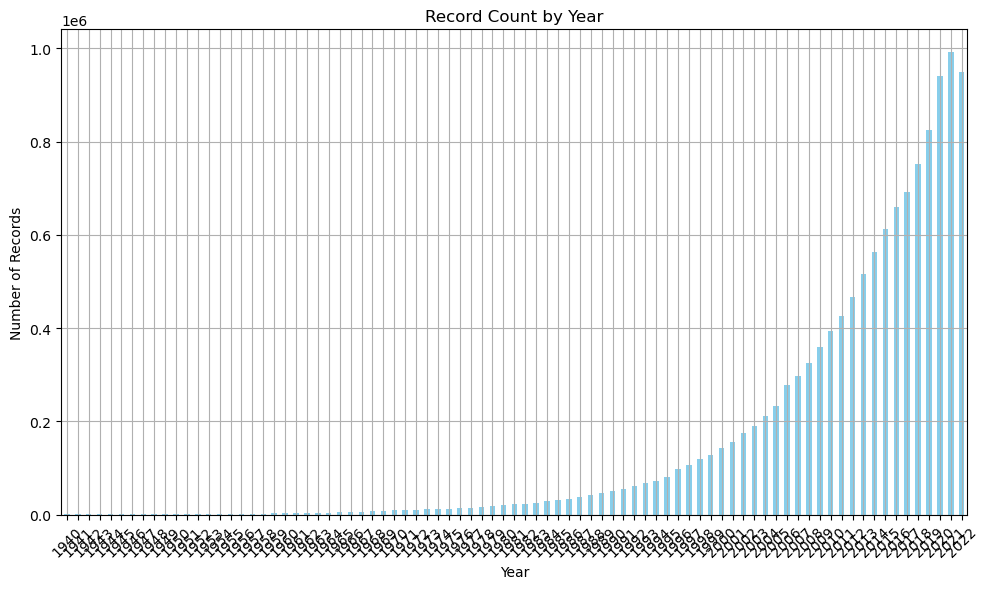

In [3]:
start_year = 1940
end_year = 2022
plot_records_by_year(df_collaboration, start_year, end_year)

Create an enhanced visualization graph

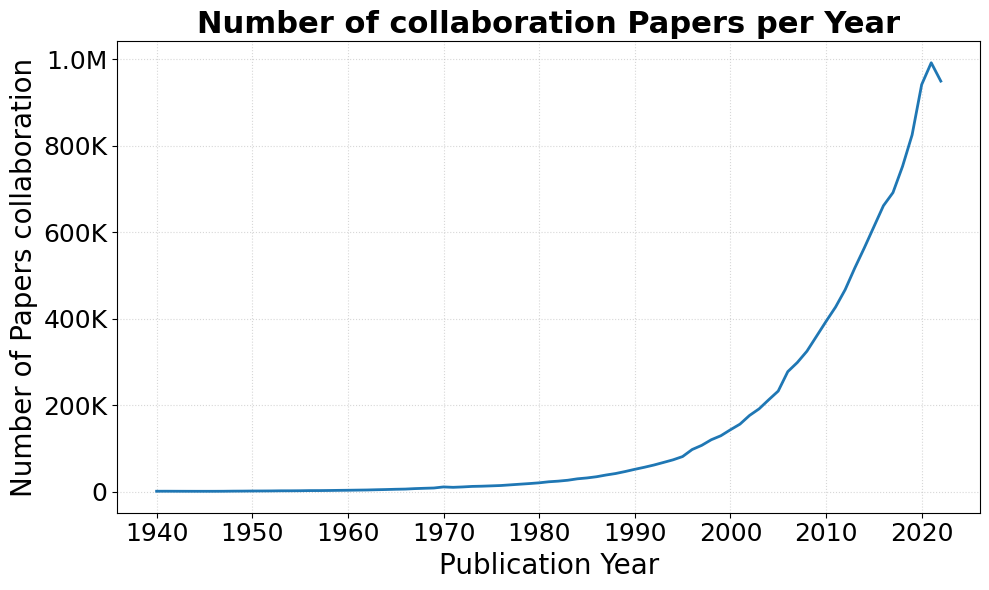

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator

def plot_records_by_year(df, start_year=None, end_year=None):
    """
    Plot the number of collaboration records per publication year as a line chart
    with readable Y axis formatting, smart X tick spacing, and larger font sizes.
    """
    # Convert publication_year to numeric
    df = df.copy()
    df['publication_year'] = pd.to_numeric(df['publication_year'], errors='coerce')

    # Filter by year range
    if start_year is not None:
        df = df[df['publication_year'] >= start_year]
    if end_year is not None:
        df = df[df['publication_year'] <= end_year]

    # Count records per year
    count_by_year = df['publication_year'].value_counts().sort_index()

    # Prepare figure
    fig, ax = plt.subplots(figsize=(10, 6))

    # Line chart
    ax.plot(count_by_year.index.astype(int), count_by_year.values, linewidth=2)

    # Y axis formatter: 1.2M, 850K, etc.
    def yfmt(x, _pos):
        if x >= 1_000_000:
            return f"{x/1_000_000:.1f}M"
        if x >= 1_000:
            return f"{x/1_000:.0f}K"
        return f"{int(x)}"
    ax.yaxis.set_major_formatter(FuncFormatter(yfmt))

    # Smart tick spacing on X: limit to about 10 ticks and keep them integer years
    ax.xaxis.set_major_locator(MaxNLocator(nbins=10, integer=True))

    # Labels and styling with bigger font
    ax.set_title("Number of Collaboration Papers per Year", fontsize=22, fontweight='bold')
    ax.set_xlabel("Publication Year", fontsize=20)
    ax.set_ylabel("Number of Collaboration Papers", fontsize=20)

    # Increase tick label font size
    ax.tick_params(axis='both', which='major', labelsize=18)

    # Grid styling
    ax.grid(axis="both", linestyle=":", alpha=0.5)

    plt.tight_layout()
    plt.show()


# Example usage
start_year = 1940
end_year = 2022
plot_records_by_year(df_collaboration, start_year, end_year)


# Analysis of the number of collaborations, normalized by the number of publications

In [6]:
file_path = "../data/collaboration/works_year_countries.csv"
df_all = pd.read_csv(file_path, delimiter=',')

In [7]:
df_all

,work_id,publication_year,countries
0,https://openalex.org/W143756818,1998,Germany
1,https://openalex.org/W1437651587,1973,Czechia
2,https://openalex.org/W143770321,2000,China
3,https://openalex.org/W1437735228,2003,United States
4,https://openalex.org/W143773981,2002,Belgium
...,...,...,...
88742457,https://openalex.org/W2376178880,2007,China
88742458,https://openalex.org/W2376181119,2011,China
88742459,https://openalex.org/W2376182430,2010,China
88742460,https://openalex.org/W2376183146,2008,China


Create a graph of global collaborations percentage

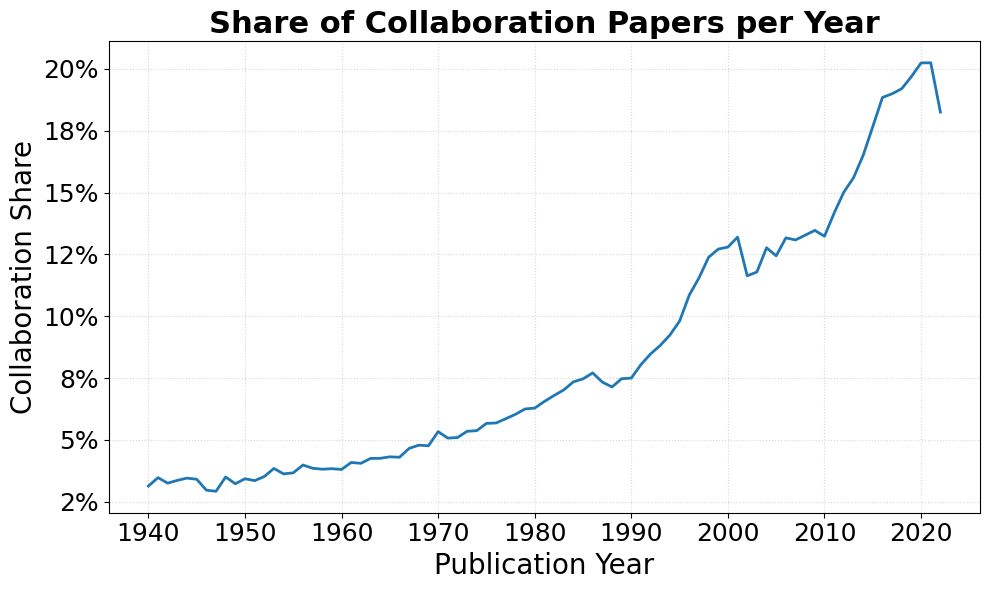

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator

def plot_collaboration_share(
    df_collaboration,
    df_all,
    start_year=None,
    end_year=None,
    figsize=(10, 6)
):
    """
    Create a unified chart that shows the share of collaboration papers
    normalized by total published papers per year.

    Inputs:
    - df_collaboration: DataFrame with a 'publication_year' column for collaboration papers
    - df_all: DataFrame with a 'publication_year' column for all papers
    - start_year, end_year: optional inclusive bounds for the year range
    - figsize: matplotlib figure size
    """
    # Clean year columns
    coll_years = pd.to_numeric(df_collaboration["publication_year"], errors="coerce").dropna().astype(int)
    all_years  = pd.to_numeric(df_all["publication_year"], errors="coerce").dropna().astype(int)

    # Filter by range
    if start_year is not None:
        coll_years = coll_years[coll_years >= start_year]
        all_years  = all_years[all_years >= start_year]
    if end_year is not None:
        coll_years = coll_years[coll_years <= end_year]
        all_years  = all_years[all_years <= end_year]

    # Count per year
    coll_counts = coll_years.value_counts().sort_index()
    all_counts  = all_years.value_counts().sort_index()

    if all_counts.empty:
        raise ValueError("No data in df_all after filtering.")

    # Build a full continuous year index
    year_min = min(coll_counts.index.min() if not coll_counts.empty else all_counts.index.min(),
                   all_counts.index.min())
    year_max = max(coll_counts.index.max() if not coll_counts.empty else all_counts.index.max(),
                   all_counts.index.max())
    year_index = pd.Index(range(year_min, year_max + 1), name="publication_year")

    # Reindex to the full year range
    coll_counts = coll_counts.reindex(year_index, fill_value=0)
    all_counts  = all_counts.reindex(year_index, fill_value=0)

    # Compute share safely
    share = np.divide(coll_counts.values, all_counts.values, out=np.zeros_like(coll_counts.values, dtype=float), where=all_counts.values != 0)
    share = pd.Series(share, index=year_index)

    # Plot
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(share.index, share.values, linewidth=2)

    # Pretty axes
    ax.set_title("Share of Collaboration Papers per Year", fontsize=22, fontweight="bold")
    ax.set_xlabel("Publication Year", fontsize=20)
    ax.set_ylabel("Collaboration Share", fontsize=20)

    # Y axis as percent
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{x:.0%}"))

    # Smart X ticks
    ax.xaxis.set_major_locator(MaxNLocator(nbins=10, integer=True))

    # Larger tick labels
    ax.tick_params(axis="both", which="major", labelsize=18)

    # Grid
    ax.grid(axis="both", linestyle=":", alpha=0.5)

    plt.tight_layout()
    plt.show()


# Example usage
start_year = 1940
end_year = 2022
plot_collaboration_share(df_collaboration, df_all, start_year, end_year, figsize=(10, 6))


## Collaborations in Israel

In [8]:
file_path = "../data/collaboration/works_israel.csv"
df_israel = pd.read_csv(file_path, delimiter=',') 

In [9]:
df_israel

,work_id,publication_year,countries
0,https://openalex.org/W1438510599,2015,"United Kingdom,Israel,France"
1,https://openalex.org/W2052031909,2010,"Israel,Canada"
2,https://openalex.org/W2052156706,2013,"United States,Israel"
3,https://openalex.org/W2052285261,2013,"Israel,Germany"
4,https://openalex.org/W2052550778,1988,"United States,Israel"
...,...,...,...
261258,https://openalex.org/W2361585691,2015,"Israel,China"
261259,https://openalex.org/W236481250,1998,"Israel,Canada"
261260,https://openalex.org/W2366785243,2014,"Israel,China"
261261,https://openalex.org/W2368860481,2009,"Israel,China"


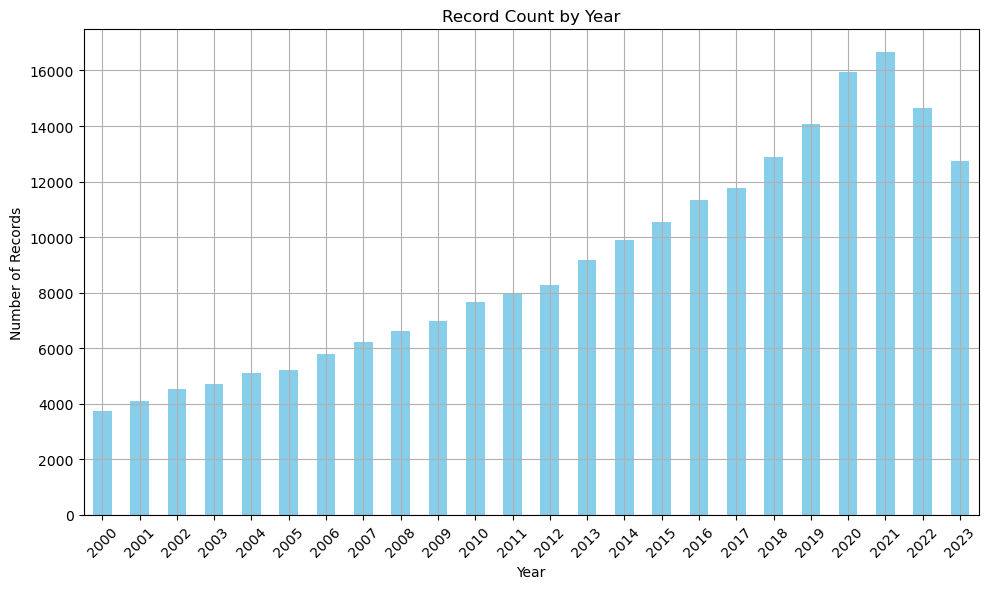

In [ ]:
start_year = 2000
end_year = 2023    

plot_records_by_year(df_israel, start_year, end_year)